## Clustering by KModes
This customer segmentation by kmodes clustering is for demonstration purpose. Below sample data and modeling is to cluster customers based on their line of business, market reach, and purchasing pattern. In the actual data, Business Line and market reach data are collected by sales team based on observations, formal questionnaires, and informal interviews. Purchasing pattern includes purchase frequency and product bought most frequently, these are based on customer purchasing history. 

In [95]:
#import libraries
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline
import random
random.seed(54)
print("ready")

ready


In [96]:
#import data
filepath = "C:/Users/Hp/OneDrive/model/customerSegmentation/CodedCharacteristics.csv"
df = pd.read_csv(filepath)
#df.head()

In [97]:
#pull necessary data
df2 = df.iloc[:,1:5].copy()
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Line of business    40 non-null     object
 1   Regional            40 non-null     object
 2   ProductCat          40 non-null     object
 3   Purchasing pattern  40 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


,Line of business,Regional,ProductCat,Purchasing pattern
0,Construction,National,Full,Consistent
1,Construction,National,Full,Consistent
2,Construction,National,Full,Consistent
3,Construction,National,Full,Consistent
4,Construction,National,Full,Consistent


In [98]:
#remove null values
df2.isnull().sum()
df2.dropna(inplace=True)
df2.isnull().sum()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Line of business    40 non-null     object
 1   Regional            40 non-null     object
 2   ProductCat          40 non-null     object
 3   Purchasing pattern  40 non-null     object
dtypes: object(4)
memory usage: 1.6+ KB


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 77.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 77.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 77.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 77.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 77.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 49.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5, cost: 50.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration

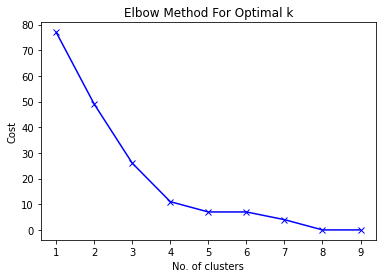

In [99]:
#Find optimal K clusters looking at elbow graph
num_clusters=3
cost = []
K = range(1,10)

for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df2)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [100]:
#build kmode model with 4 clusters
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df2)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 22.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 34.0
Run 2, iteration: 2/100, moves: 0, cost: 34.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 45.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 8, cost: 11.0
Run 4, iteration: 2/100, moves: 4, cost: 11.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9, cost: 11.0
Run 5, iteration: 2/100, moves: 0, cost: 11.0
Best run was number 4


array([0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 2, 2, 2, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1], dtype=uint16)

In [101]:
#insert cluster number into df
df2.insert(0, "Cluster", clusters, True)

In [102]:
df2[df2['Cluster']==0]

,Cluster,Line of business,Regional,ProductCat,Purchasing pattern
0,0,Construction,National,Full,Consistent
1,0,Construction,National,Full,Consistent
2,0,Construction,National,Full,Consistent
3,0,Construction,National,Full,Consistent
4,0,Construction,National,Full,Consistent
15,0,Construction,National,Full,Consistent
16,0,Construction,National,Full,Consistent
17,0,Construction,National,Full,Consistent
18,0,Construction,National,Full,Consistent
19,0,Construction,National,Full,Erratic


Cluster 0 serves the construction industry and their market reach is more widespread and they take full range products, this could be due to their nature of business is bigger than can be served by a single supplier.

In [103]:
df2[df2['Cluster']==1]

,Cluster,Line of business,Regional,ProductCat,Purchasing pattern
12,1,Furniture,Peninsular,CR,Consistent
13,1,Furniture,Peninsular,CR,Consistent
14,1,Furniture,Peninsular,CR,Consistent
27,1,Furniture,Peninsular,CR,Erratic
28,1,Furniture,Peninsular,CR,Erratic
29,1,Furniture,Peninsular,CR,Erratic
37,1,Furniture,Peninsular,CR,Erratic
38,1,Furniture,Peninsular,CR,Erratic
39,1,Furniture,Peninsular,CR,Erratic


Cluster 1 serves the Furniture customers and the nature of the business is far reaching.

In [104]:
df2[df2['Cluster']==2]

,Cluster,Line of business,Regional,ProductCat,Purchasing pattern
9,2,Foundry,Local,Full,Consistent
10,2,Foundry,Local,Full,Consistent
11,2,Foundry,Local,Full,Consistent
24,2,Foundry,Local,Full,Erratic
25,2,Foundry,Local,Full,Erratic
26,2,Foundry,Local,Full,Erratic
34,2,Foundry,Local,Full,Erratic
35,2,Foundry,Local,Full,Erratic
36,2,Foundry,Local,Full,Erratic


Cluster 2 serves the foundry businesses and the nature of their business (high margin longer payment period) may mean their businesses are more difficult to expand in a business that requires large capital for inventory.

In [105]:
df2[df2['Cluster']==3]

,Cluster,Line of business,Regional,ProductCat,Purchasing pattern
5,3,Construction,Local,HR,Consistent
6,3,Construction,Local,HR,Consistent
7,3,Construction,Local,HR,Consistent
8,3,Construction,Local,HR,Consistent
20,3,Construction,Local,HR,Erratic
21,3,Construction,Local,HR,Erratic
22,3,Construction,Local,HR,Erratic
23,3,Construction,Local,HR,Erratic
30,3,Construction,Local,HR,Erratic
31,3,Construction,Local,HR,Erratic


Cluster 3 also serves the construction industry though their market reach is more localized and product category is HR, meaning they may be sourcing the full range from other suppliers. This is a common sourcing tactic used by smaller players. 